# Introduction to Supervised Learning

## Data

To apply ML we need (clean and processed) data. To understand how it works, let's check at an example of an imaginary store: we have data about temperature (ºC) and ice cream sales (€).

The data we use for creating (training) models is called training data.

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame({
    'temp (x)': [5, 8, 10, 12, 20, 23, 33, 35],
    'sales (y)': [200, 235, 210, 240, 420, 435, 560, 620]})
df

,temp (x),sales (y)
0,5,200
1,8,235
2,10,210
3,12,240
4,20,420
5,23,435
6,33,560
7,35,620


We use the temperature for predicting sales.

Conventional names are:

- X for referring to the features/attributes that help in the prediction (temperature in our case).
- y for referring to the target attribute we want to predict (sales in our case).

In [54]:
# temperature (ºC)
X = df[['temp (x)']].values

# sales (€)
y = df['sales (y)'].values

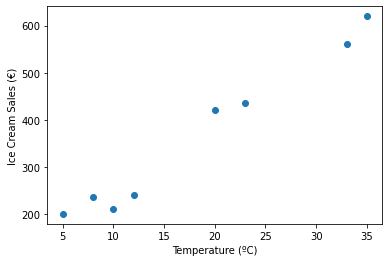

In [55]:
def plot_data(X, y):
    plt.scatter(X, y)
    plt.xlabel('Temperature (ºC)')
    plt.ylabel('Ice Cream Sales (€)')

plot_data(X, y)
plt.show()

## Linear Model

Line has the form:

$$
f(x)=w_0 + w_1 · x
$$

If we asume:

$$
w_0=100   
$$
$$    
w_1=14
$$

The prediction of Ice cream sales is:
$$
ŷ=100+14x
$$

where x is the temperature.
We use ŷ for referring to the prediction given by our function approximation and y for referring to the real sales values in our data.

In [56]:
# Model

w0 = 100
w1 = 14

# predicted y
y_pred = w0 + w1 * X

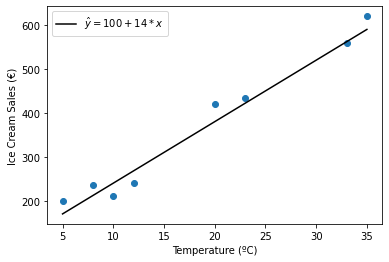

In [57]:
# Model

plot_data(X, y)
plt.plot(X, y_pred, color='black', label="$\hat{y} = 100 + 14 * x$")
plt.legend()
plt.show()

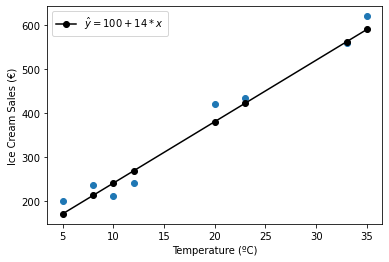

In [58]:
# Predictions

plot_data(X, y)
plt.plot(X, y_pred, marker='o', color='black', label="$\hat{y} = 100 + 14 * x$")
plt.legend()
plt.show()

In [59]:
df['sales_pred (ŷ)'] = y_pred
df

,temp (x),sales (y),sales_pred (ŷ)
0,5,200,170
1,8,235,212
2,10,210,240
3,12,240,268
4,20,420,380
5,23,435,422
6,33,560,562
7,35,620,590


Are good the predictions good? It seems a reasonable model. But is this other model (orange) better or worse than the previous one (black)?
Is needed a way to quantify how good the predictions are.

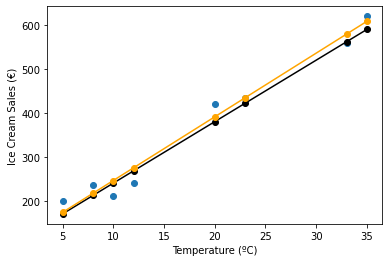

In [60]:
def plot_2_models(y1, y2):
    plt.scatter(X, y)
    plt.plot(X, y1, marker='o', color='black', label="$\hat{y} = 100 + 14 * x$")
    plt.plot(X, y2, marker='o', color='orange', label="$\hat{y} = 101 + 14.5 * x$")
    plt.xlabel('Temperature (ºC)')
    plt.ylabel('Ice Cream Sales (€)')

# Predictions 2
y_pred_model_2 = 101 + 14.5 * X
plot_2_models(y_pred, y_pred_model_2)

## Metrics

Metrics are used for estimating the error of our model.
Two typical ML regression metrics (there are more):

- Mean Absolute Error (MAE).
- Mean Squared Error (MSE).

### MAE

MAE measures the average magnitude of the errors between predicted and observed (real) values.

$$
MAE= \frac{1}{N} \sum|y_i-ŷ_i|
$$

N is the number of observations.

In [61]:
# Absolute error between each pair of observation-prediction
df['abs_error (|y - ŷ|)'] = abs(df['sales (y)'] - df['sales_pred (ŷ)'])
df

,temp (x),sales (y),sales_pred (ŷ),abs_error (|y - ŷ|)
0,5,200,170,30
1,8,235,212,23
2,10,210,240,30
3,12,240,268,28
4,20,420,380,40
5,23,435,422,13
6,33,560,562,2
7,35,620,590,30


In [62]:
# MAE (sum of all elements divided by the length = mean)
mae = df['abs_error (|y - ŷ|)'].mean()
print(f'MAE: {mae} €')

MAE: 24.5 €


For simplicity, can be used a predefined function in sklearn for calculating MAE:

In [63]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(df['sales (y)'], df['sales_pred (ŷ)'])
print(f'MAE: {mae} €')

MAE: 24.5 €


In [40]:
# Model 2

w0_2 = 101
w1_2 = 14.5

# predicted y_2
y_pred_model_2 = w0_2 + w1_2 * X

df['sales_pred (ŷ_2)'] = y_pred_model_2
df['abs_error (|y - ŷ_2|)'] = abs(df['sales (y)'] - df['sales_pred (ŷ_2)'])
df

,temp (x),sales (y),sales_pred (ŷ),abs_error (|y - ŷ|),sales_pred (ŷ_2),abs_error (|y - ŷ_2|)
0,5,200,170,30,173.5,26.5
1,8,235,212,23,217.0,18.0
2,10,210,240,30,246.0,36.0
3,12,240,268,28,275.0,35.0
4,20,420,380,40,391.0,29.0
5,23,435,422,13,434.5,0.5
6,33,560,562,2,579.5,19.5
7,35,620,590,30,608.5,11.5


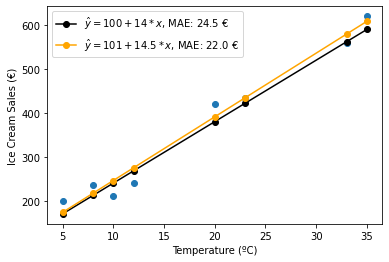

In [41]:
mae_2 = mean_absolute_error(df['sales (y)'], df['sales_pred (ŷ_2)'])

def plot_2_models_maes():
    plt.scatter(X, y)
    plt.plot(X, y_pred, marker='o', color='black', label=f"$\hat{{y}} = 100 + 14 * x$, MAE: {mae:.1f} €")
    plt.plot(X, y_pred_model_2, marker='o', color='orange', label=f"$\hat{{y}} = 101 + 14.5 * x$, MAE: {mae_2:.1f} €")
    plt.xlabel('Temperature (ºC)')
    plt.ylabel('Ice Cream Sales (€)')
    plt.legend(loc='upper left')

plot_2_models_maes()
plt.show()

### MSE

MSE measures the average of the squares of the errors.


$$
MSE= \frac{1}{N} \sum(y_i-ŷ_i)²
$$

N is the number of observations.

MSE is more sensitive to outliers than MAE. 

An outlier is an observation that deviates significantly from other observations in a dataset. In other words, it's a data point that lies outside the overall pattern of the data. Outliers can occur due to various reasons, such as measurement or recording errors, natural variation in the data, or they could represent genuinely different behavior in the data.

In [64]:
# Absolute error between each pair of observation-prediction
df['abs_error_sq ((y - ŷ)²)'] = (df['sales (y)'] - df['sales_pred (ŷ)'])**2
df

,temp (x),sales (y),sales_pred (ŷ),abs_error (|y - ŷ|),abs_error_sq ((y - ŷ)²)
0,5,200,170,30,900
1,8,235,212,23,529
2,10,210,240,30,900
3,12,240,268,28,784
4,20,420,380,40,1600
5,23,435,422,13,169
6,33,560,562,2,4
7,35,620,590,30,900


In [65]:
# MSE (sum of all elements divided by the length = mean)
mse = df['abs_error_sq ((y - ŷ)²)'].mean()
print(f'MSE: {mse} €')

MSE: 723.25 €


For simplicity, we could use a predefined function in sklearn for calculating MSE:

In [77]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['sales (y)'], df['sales_pred (ŷ)'])
print(f'MSE: {mse} €²')

MSE: 723.25 €²


In [70]:
# Absolute error between each pair of observation-prediction_2
df['abs_error_sq ((y - ŷ_2)²)'] = (df['sales (y)'] - df['sales_pred (ŷ_2)'])**2
df

,temp (x),sales (y),sales_pred (ŷ),abs_error (|y - ŷ|),abs_error_sq ((y - ŷ)²),sales_pred (ŷ_2),abs_error (|y - ŷ_2|),abs_error_sq ((y - ŷ_2)²)
0,5,200,170,30,900,173.5,26.5,702.25
1,8,235,212,23,529,217.0,18.0,324.00
2,10,210,240,30,900,246.0,36.0,1296.00
3,12,240,268,28,784,275.0,35.0,1225.00
4,20,420,380,40,1600,391.0,29.0,841.00
5,23,435,422,13,169,434.5,0.5,0.25
6,33,560,562,2,4,579.5,19.5,380.25
7,35,620,590,30,900,608.5,11.5,132.25


In [76]:
# MSE_2
mse_2 = df['abs_error_sq ((y - ŷ_2)²)'].mean()
print(f'MSE: {mse_2} €²')

MSE: 612.625 €²


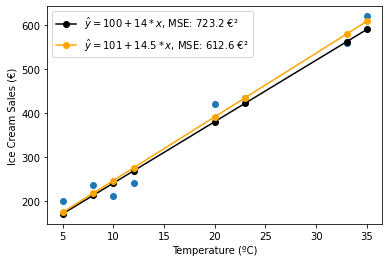

In [75]:
def plot_2_models_mses():
    plt.scatter(X, y)
    plt.plot(X, y_pred, marker='o', color='black', label=f"$\hat{{y}} = 100 + 14 * x$, MSE: {mse:.1f} €²")
    plt.plot(X, y_pred_model_2, marker='o', color='orange', label=f"$\hat{{y}} = 101 + 14.5 * x$, MSE: {mse_2:.1f} €²")
    plt.xlabel('Temperature (ºC)')
    plt.ylabel('Ice Cream Sales (€)')
    plt.legend(loc='upper left')

plot_2_models_mses()
plt.show()

### MAE vs MSE

**Which is better?**

It depends. 

Problem Sensitivity:

- MAE if problem is not sensitive to large errors.
- MSE if problem is sensitive to large errors.

Interpretability:

- MAE in the same units as target.
- MSE not as interpretable (another option: RMSE).

Optimization:

- MSE for problems requiring gradient-based optimization.